# Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read the dataset to python environment

In [69]:
data=pd.read_excel('iris.xls')

In [70]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
#To get the basic information about datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [72]:
#To display stats about data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Do the necessary pre-processing steps

In [73]:
#check null values in the dataset
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [74]:
data['SL']=data['SL'].fillna(data['SL'].median())
data['SW']=data['SW'].fillna(data['SW'].median())
data['PL'] = data['PL'].fillna(data['PL'].median())
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

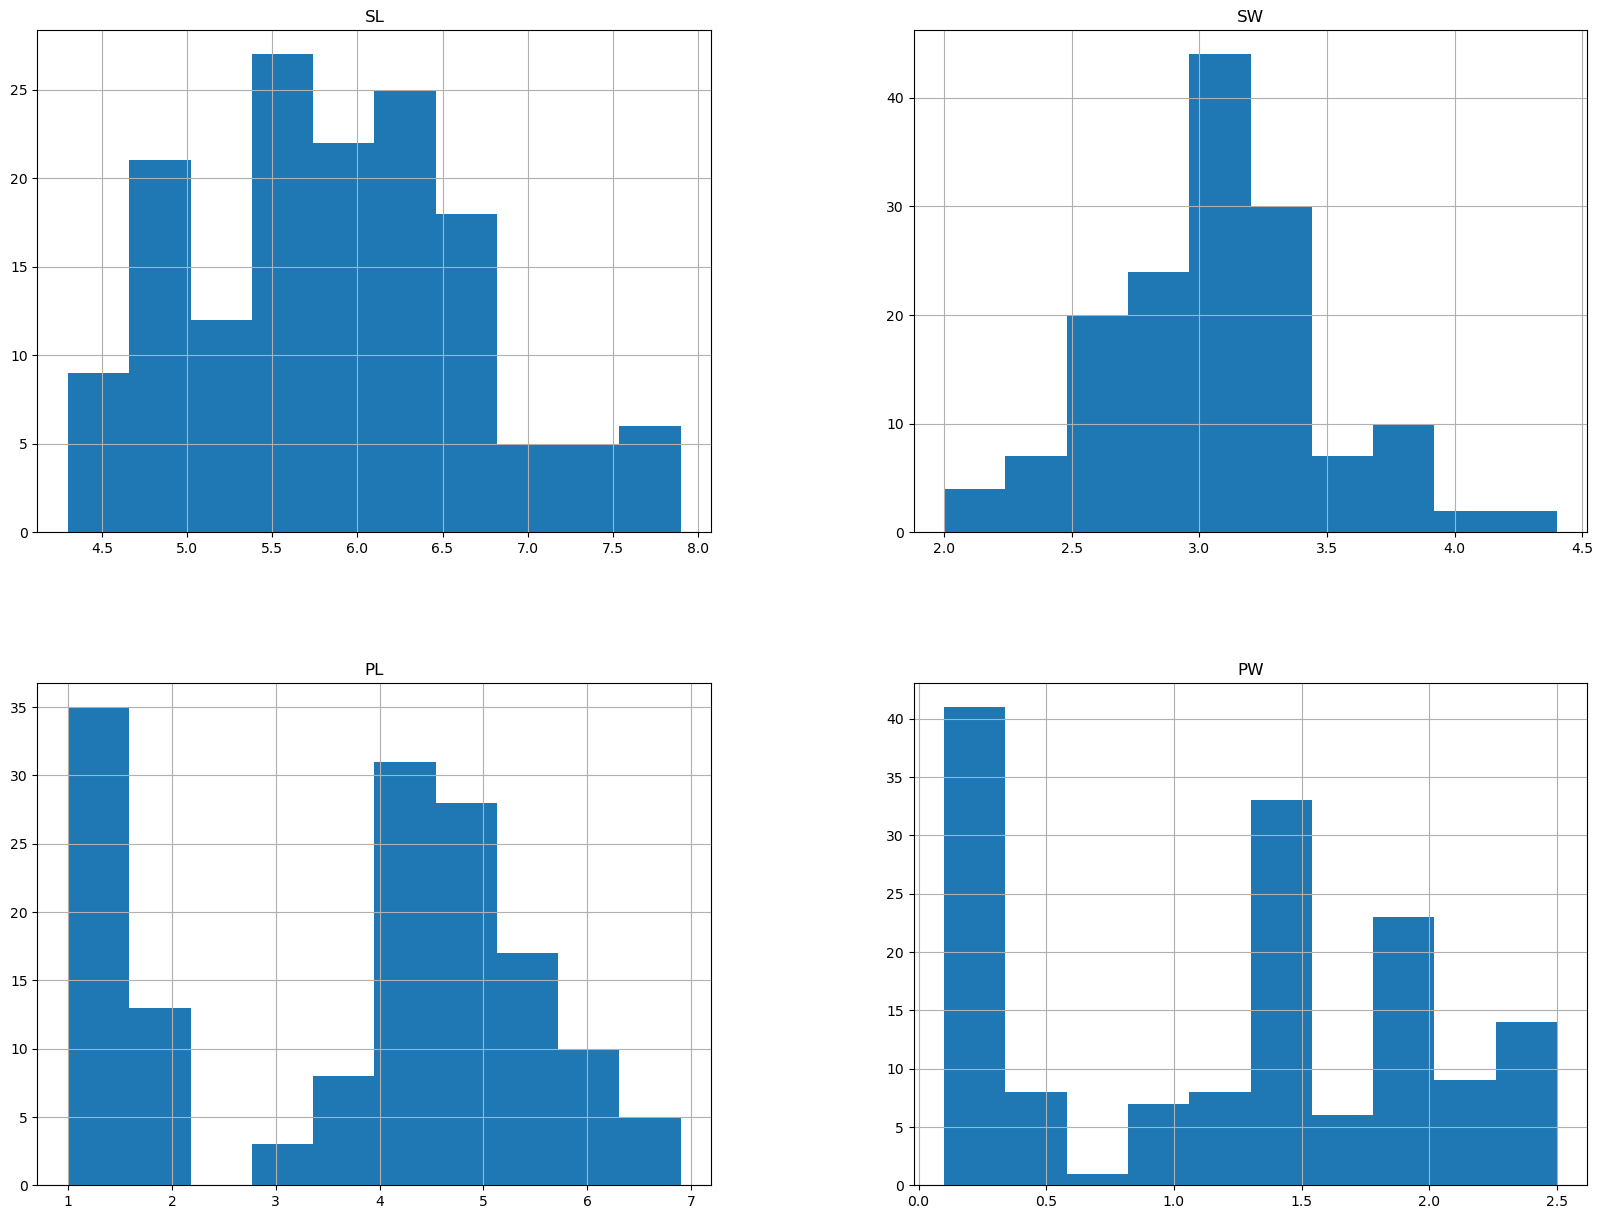

In [75]:
#Histogram representation
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15));

In [76]:
#Display the Correlation Matrix
data.corr(numeric_only=True)

,SL,SW,PL,PW
SL,1.000000,-0.099107,0.830554,0.800939
SW,-0.099107,1.000000,-0.405531,-0.338655
PL,0.830554,-0.405531,1.000000,0.936089
PW,0.800939,-0.338655,0.936089,1.000000


<Axes: >

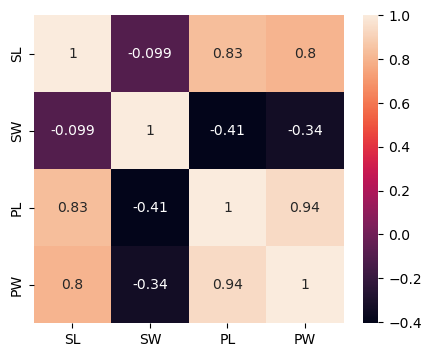

In [77]:
#Heat map of Correlation matrix
cormat=data.corr(numeric_only=True)
plt.subplots(figsize=(5,4))
sns.heatmap(cormat,annot=True)

In [78]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [79]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3.  Find out which classification model gives the best result

In [80]:
#Model Training and Testing
X=data.drop('Classification',axis=1)
y=data['Classification']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

##### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [83]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)
log_pred

C:\Users\sumy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,log_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [85]:
print('Accuracy:',accuracy_score(y_test,log_pred))

Accuracy: 0.9736842105263158


In [86]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_Xtrain=scaler.fit_transform(X_train)
Scaled_Xtest=scaler.fit_transform(X_test)

In [87]:
log_reg.fit(Scaled_Xtrain,y_train)
log_pred=log_reg.predict(Scaled_Xtest)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,log_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [89]:
print('Accuracy:',accuracy_score(y_test,log_pred))

Accuracy: 0.9736842105263158


##### K-nearest Neighbours

In [90]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [91]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    knn_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,knn_pred)
    metric_k.append(accuracy)

In [92]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,knn_pred))

[[14  1  0]
 [ 0 10  1]
 [ 0  0 12]]


In [93]:
print('Accuracy:',accuracy_score(y_test,knn_pred))

Accuracy: 0.9473684210526315


##### DecisionTree

In [94]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred=dt_clf.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [97]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


##### SVM Model

In [98]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')#use SVC(kernel='linear') for improving accuracy
sv_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [99]:
y_pred=sv_clf.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [101]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


##### RandomForest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)

In [103]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [104]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### Observations

###### We have got same accuracy in DecisionTree,SVM and RandomForest and these models can shows high accuracy(1.0).So we can use anyone of these model for better accuracy

